# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and and data science 
libraries in an attempt to build a machine learning model capable of predicting whether or not 
someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem Statement

In a statement,
> Given clinial parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from Cleveland data from the UCI Machine Learning Repository. 
https://archive.ics.uci.edu/ml/datasets/heart+disease


## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the POC, we will pursue the project.

## 4. Features

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

## Preparing the tools

Import all neccessary libraries.

In [1]:
# Basic EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Models from scikit lean
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load the data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## Data Exploration (EDA)

The goal gere is to find out more about the data and become a subject matter experrt on the dataset

1. What questions are we trying tro solve
2. What kind of data (numerical, categorical etc)
3. Missing Data
4. Outliers
5. How to add, change, remove features

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# how many of each class there are
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

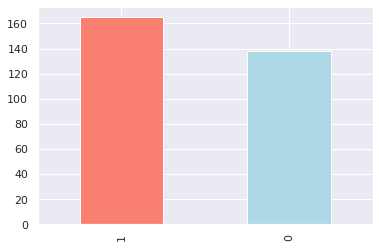

In [6]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [7]:
# Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Check for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


## Heart Disease Frequency according to Sex

In [10]:
# 1 is male and 0 is female
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
# Compare target column with the sec column
pd.crosstab(df['target'], df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

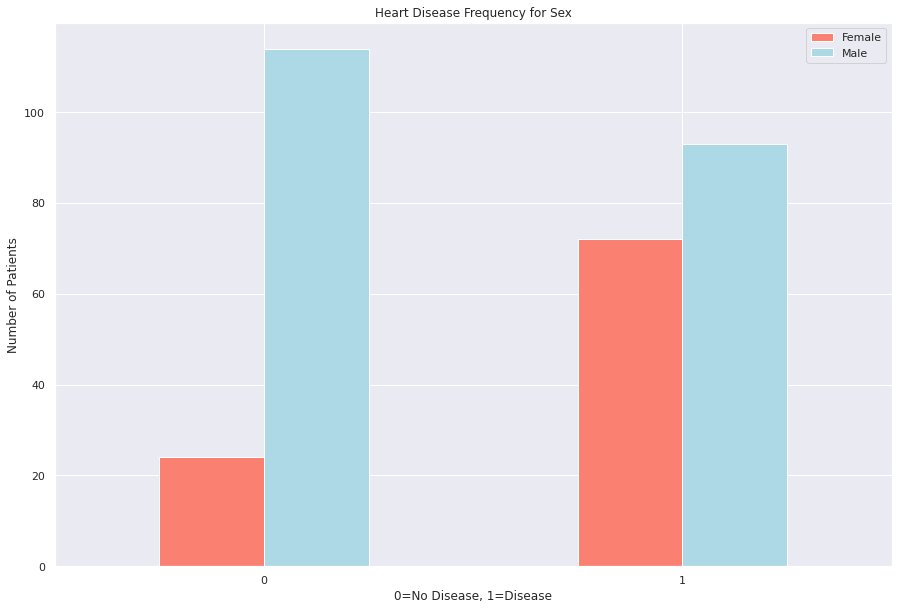

In [12]:
pd.crosstab(df['target'], df.sex).plot(kind='bar', figsize=(15,10),color=['salmon', 'lightblue'])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0=No Disease, 1=Disease")
plt.ylabel("Number of Patients")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

## Age Vs Max Heart Rate for Heart Disease

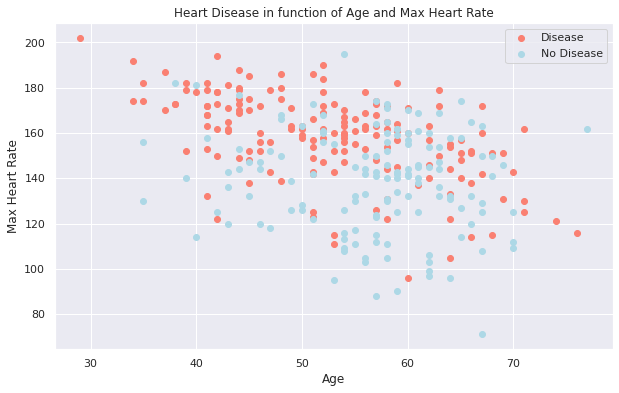

In [13]:
# Create another figure

plt.figure(figsize=(10,6))

# Scatter Plot Positive Examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='salmon')


# Scatter Plot Negative Examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='lightblue')

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(['Disease','No Disease']);

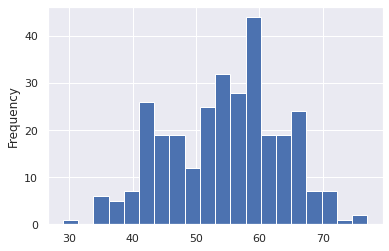

In [14]:
df.age.plot.hist(bins=20);

## Heart Disease Frequency per Chest Pain Type


In [15]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


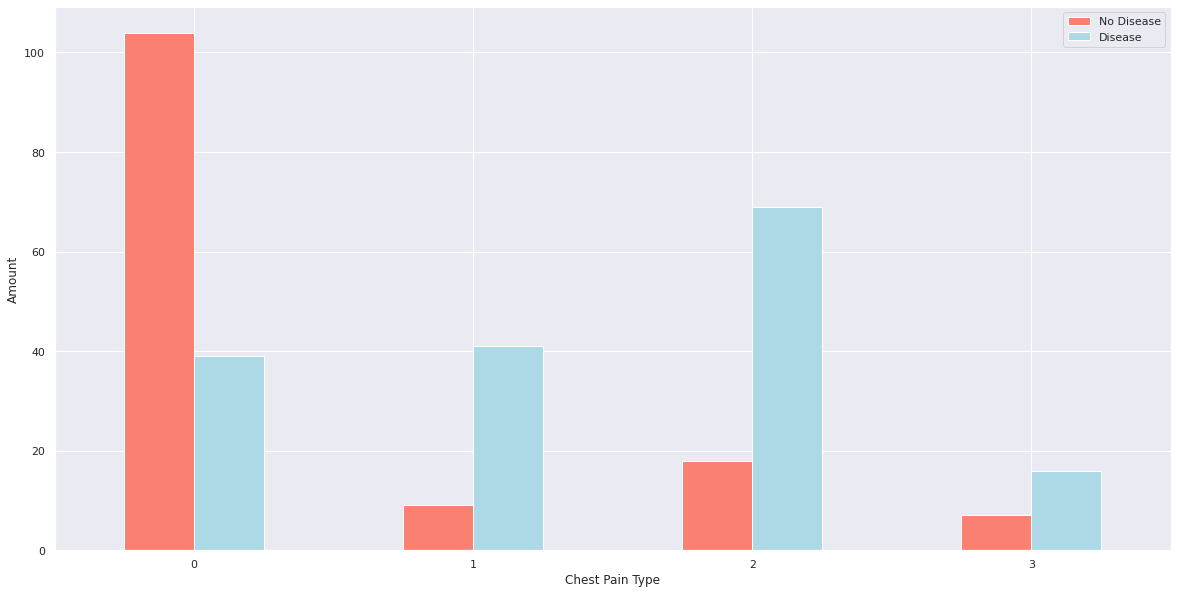

In [16]:
# Make the crosstab more visual

pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(20,10),
                                   color=['salmon','lightblue'])

plt.title("")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);

## Corelation Matrix

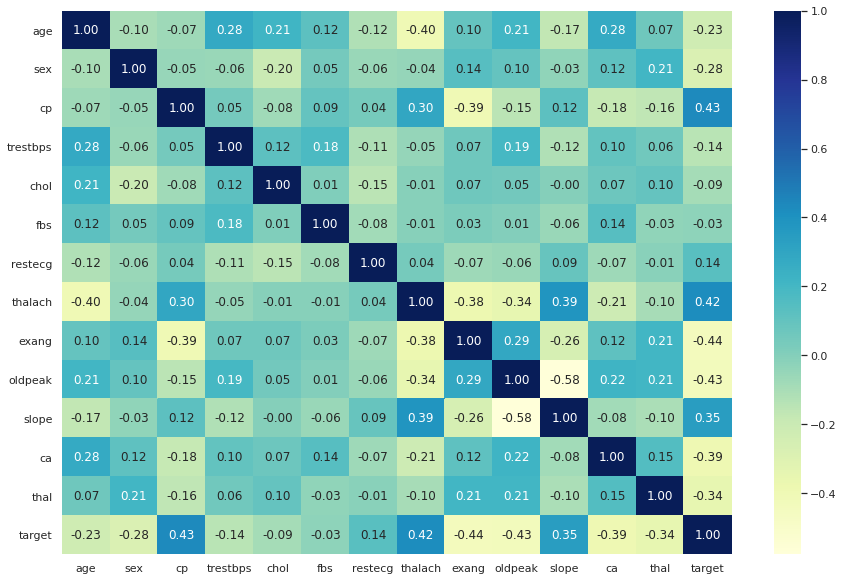

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(),
                 annot=True,
                 fmt='.2f',
                 cmap='YlGnBu');

## Modeling

**Evaluation**

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the POC, we will pursue the project.


In [18]:
# Splitting in features and label

X = df.drop(['target'],axis=1)
y = df['target']

np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


We are going to try 3 different ML models:
1. Logistic Regression
2. K-Nearest Neighbour Classifier
3. Random Forest Classifier


In [19]:
models = {"Logictic Regression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluated given ML models
    models : a dict of different Scikit-Learn models
    """
    
    np.random.seed(42)
    
    # Make a dict to score model scores
    model_scores = {}
    
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores    

In [20]:
fit_and_score(models, X_train, X_test, y_train, y_test)

/home/shubham/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logictic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

Lets look at the following:

1. Hyperparameter Tuning
2. Cross Validation

3. Confusion Matrix
4. Accuracy
5. Precision
6. Recall
7. F1 Score
8. Classification Report
9. ROC and AUC

10. Feature Importance

## Hyperparameter Tuning

In [21]:
# Tuning KNN

train_scores=[]
test_scores=[]


# Create a list of different values of N neighbors

neighbours = range(1,21)

knn = KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors=i)
    
    
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Max KNN Score on the test data: 75.41%


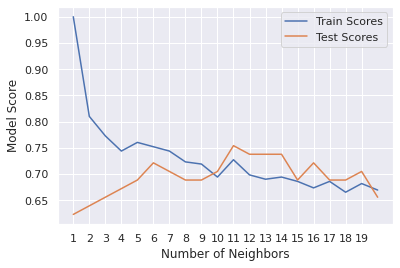

In [22]:
plt.plot(neighbours,train_scores,label='Train Scores')
plt.plot(neighbours,test_scores,label='Test Scores')
plt.xticks(range(1,20))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print("Max KNN Score on the test data: {}%".format(round(max(test_scores)*100,2)))

## Hyperparameter tuning with Randomized Search CV

We are going to tune:
* Logistic Regression()
* Random Forest Classifier()

..using Randomized Search CV

In [23]:
# Create a HP grid for LR

log_reg_grid = {"C" : np.logspace(-4,4,20),
                "solver" : ["liblinear"]}

# Create a HP grid for RF

rf_grid = {"n_estimators" : np.arange(10,1000,50),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split" : np.arange(2,20,2),
           "min_samples_leaf" : np.arange(1,20,2)}

In [24]:
# Tuning Logistic Regression
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

rs_log_reg.fit(X,y)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [25]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [26]:
# Tuning Random Forest Classifier

np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

rs_rf.fit(X,y)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   52.0s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [27]:
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 12,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [28]:
rs_rf.score(X_test, y_test)

0.8688524590163934

## Tuning using GridSearchCV

Since our LR model provides best score so far, we will try and improve it further.

In [37]:
# Create a HP grid for LR

log_reg_grid = {"C" : np.logspace(-4, 4, 30),
                "solver" : ["liblinear"]}


# Tuning Logistic Regression
np.random.seed(42)

grid_log_reg = GridSearchCV(LogisticRegression(),
                               param_grid=log_reg_grid,
                               cv=5,
                               verbose=True)

grid_log_reg.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [38]:
grid_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [39]:
grid_log_reg.score(X_test,y_test)

0.8852459016393442

### Evaluating our tuned ML Model:

* ROC and AUC
* Confusion Matrix
* Classification Report
* Precision, Recall and F1 Score
* Use Cross Validation


In [40]:
# Make Predictions

y_preds = grid_log_reg.predict(X_test)

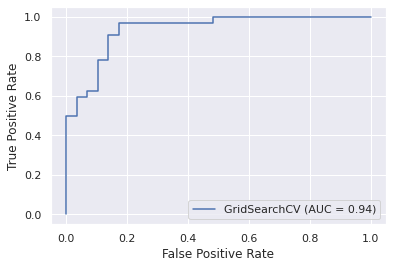

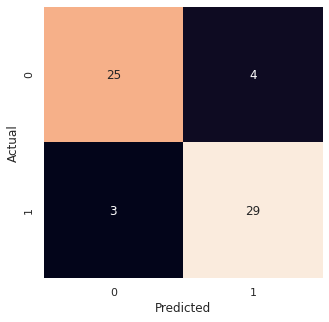

In [41]:
# Plot ROC Curve and calculate AUC metric
plot_roc_curve(grid_log_reg, X_test,y_test)

# Confusion Matrix
def plot_conf_matrix(y_test, y_preds):
    fig,ax = plt.subplots(figsize=(5,5))
    
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plot_conf_matrix(y_test, y_preds)

In [42]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [43]:
def calc_metrics(confusion_matrix):
    
    tn=confusion_matrix[0][0]
    tp=confusion_matrix[1][1]
    fp=confusion_matrix[0][1]
    fn=confusion_matrix[1][0]
    
    print("True Positives:", tp)
    print("True Negatives:", tn)
    print("False Positives:", fp)
    print("False Negatives:", fn)
    
    print("Accuracy {(TP+TN)/TOTAL}:", round((tp+tn)/(tp+tn+fp+fn),2))
    print("Recall {(TP)/Actual Yes}:", round((tp)/(tp+fn),2))
    print("Precision {(TP)/Predicted Yes}:", round((tp)/(tp+fp),2))
    
    print("True Positive Rate {(TP)/Actual Yes}:", round((tp)/(tp+fn),2))
    print("False Positive Rate {(FP)/Actual No}:", round((fp)/(tn+fp),2))


In [44]:
calc_metrics(confusion_matrix(y_test,y_preds))

True Positives: 29
True Negatives: 25
False Positives: 4
False Negatives: 3
Accuracy {(TP+TN)/TOTAL}: 0.89
Recall {(TP)/Actual Yes}: 0.91
Precision {(TP)/Predicted Yes}: 0.88
True Positive Rate {(TP)/Actual Yes}: 0.91
False Positive Rate {(FP)/Actual No}: 0.14
